#### Packages required

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings

warnings.filterwarnings('ignore')

#### Loading Data

In [3]:
cust=pd.read_csv('C:/Users/sharm/Downloads/PYTHON_Case_study/Python Foundation Case Study 2 - Credit Card Case Study/Customer Acqusition.csv')
spend=pd.read_csv('C:/Users/sharm/Downloads/PYTHON_Case_study/Python Foundation Case Study 2 - Credit Card Case Study/spend.csv')
repay=pd.read_csv('C:/Users/sharm/Downloads/PYTHON_Case_study/Python Foundation Case Study 2 - Credit Card Case Study/Repayment.csv')

#### Meta data inspection

In [4]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


In [5]:
cust.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [6]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sl No:    1500 non-null   int64  
 1   Customer  1500 non-null   object 
 2   Month     1500 non-null   object 
 3   Type      1500 non-null   object 
 4   Amount    1500 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 58.7+ KB


In [7]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [8]:
repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB


In [9]:
repay.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


#### Data cleaning

In [4]:
# Removing useless columns:
cust.drop(columns='No',inplace=True)
spend.drop(columns='Sl No:',inplace=True)
repay.drop(columns=['SL No:','Unnamed: 4'],inplace=True)

In [5]:
# removing missing records from repay data:
repay.dropna(how='all',inplace=True)
repay.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Amount    1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 46.9+ KB


### 1. In the above dataset,
    a. In case age is less than 18, replace it with mean of age values.
    b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.
    (customer’s limit provided in acquisition table is the per transaction limit on his card)
    c. Incase the repayment amount is more than the limit, replace the repayment with the
    limit.

In [6]:
# part:a
cust.loc[cust.Age<18,'Age'] =cust.Age.mean()

In [7]:
# joining spend with customer data
cust_spend=pd.merge(left=spend,right=cust,on='Customer',how='left')

In [14]:
cust_spend.head(2)

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,JEWELLERY,485470.80,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,PETRO,410556.13,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [8]:
# part:b
cust_spend.Amount =pd.Series(np.where(cust_spend.Amount>cust_spend.Limit,(0.5*cust_spend.Limit),
                                      (cust_spend.Amount))) 

In [16]:
cust_spend.tail(2)

,Customer,Month,Type,Amount,Age,City,Product,Limit,Company,Segment
1498,A70,23-Mar-06,BUS TICKET,5000.5,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed
1499,A71,24-Mar-06,BUS TICKET,5001.0,34.00,BOMBAY,Platimum,10002.0,C33,Self Employed


In [9]:
# joining repay with the customer data
cust_repay=pd.merge(left=repay,right=cust,on='Customer',how='left')

In [18]:
cust_repay.head(2)

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [10]:
# part:c
cust_repay.Amount =pd.Series(np.where(cust_repay.Amount>cust_repay.Limit,(cust_repay.Limit),
                                      (cust_repay.Amount))) 

In [20]:
cust_repay.tail(2)

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
1498,A70,12-Aug-05,10001.0,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed
1499,A71,13-Sep-04,10002.0,34.00,BOMBAY,Platimum,10002.0,C33,Self Employed


### 2. From the above dataset create the following summaries:

##### a. How many distinct customers exist?

In [21]:
print('No of unique customers:',cust.Customer.nunique())

No of unique customers: 100


##### b. How many distinct categories exist?

In [22]:
print('distinct categories in Product type:',cust.Product.nunique())
print('distinct categories in Company:',cust.Company.nunique())
print('distinct categories in Customer Segment:',cust.Segment.nunique())
print('distinct categories in Spend_Type:',spend.Type.nunique())


distinct categories in Product type: 3
distinct categories in Company: 41
distinct categories in Customer Segment: 5
distinct categories in Spend_Type: 15


##### c. What is the average monthly spend by customers?

In [14]:
# Data type conversion
cust_spend.Month=pd.to_datetime(cust_spend.Month,format='%d-%b-%y')
cust_repay.Month=pd.to_datetime(cust_repay.Month,format='%d-%b-%y')

In [15]:
# renaming month column to date
cust_spend.rename(columns={'Month':'Date'},inplace=True)
cust_repay.rename(columns={'Month':'Date'},inplace=True)

In [16]:
# Adding Month column
cust_spend['Month']=cust_spend.Date.dt.month_name()
cust_repay['Month']=cust_repay.Date.dt.month_name()
# Adding Year column
cust_spend['Year']=cust_spend.Date.dt.year
cust_repay['Year']=cust_repay.Date.dt.year

In [26]:
cust_spend.groupby('Month')['Amount'].sum()

Month
April        20255389.10
August        6961903.04
December      3283635.05
February     36000252.50
January      51571793.96
July          6985726.35
June         10194112.96
March        30455215.99
May          31841036.26
November     12635988.51
October       3668499.92
September     5927531.59
Name: Amount, dtype: float64

##### d. What is the average monthly repayment by customers?

In [27]:
cust_repay.groupby('Month')['Amount'].sum()

Month
April        25151522.24
August        7488053.85
December      4563335.88
February     36223066.38
January      52139125.43
July          8094992.03
June          5479034.37
March        34258357.06
May          49502042.46
November     12826145.36
October       4082854.29
September     5173830.74
Name: Amount, dtype: float64

##### e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?
    (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment
    – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [28]:
monthly_spend = cust_spend.groupby('Month')['Amount'].sum().reset_index()
monthly_repay = cust_repay.groupby('Month')['Amount'].sum().reset_index()

In [29]:
spend_repay_month=pd.merge(left=monthly_repay,right=monthly_spend,on='Month',how='outer',suffixes=['_repay','_spend'])

In [30]:
spend_repay_month['profit']=spend_repay_month.Amount_repay-spend_repay_month.Amount_spend

In [31]:
spend_repay_month[spend_repay_month.profit>0]

,Month,Amount_repay,Amount_spend,profit
0,April,25151522.24,20255389.10,4896133.14
1,August,7488053.85,6961903.04,526150.81
2,December,4563335.88,3283635.05,1279700.83
3,February,36223066.38,36000252.50,222813.88
4,January,52139125.43,51571793.96,567331.47
5,July,8094992.03,6985726.35,1109265.68
7,March,34258357.06,30455215.99,3803141.07
8,May,49502042.46,31841036.26,17661006.20
9,November,12826145.36,12635988.51,190156.85
10,October,4082854.29,3668499.92,414354.37


##### f. What are the top 5 product types?

In [32]:
cust_spend.groupby('Type')['Amount'].sum().sort_values(ascending=False).head(5)

Type
PETRO           28597384.98
CAMERA          27690738.44
FOOD            20519243.60
AIR TICKET      20155847.12
TRAIN TICKET    19995825.72
Name: Amount, dtype: float64

##### g. Which city is having maximum spend?

In [33]:
(cust_spend.groupby('City')['Amount'].sum().sort_values(ascending=False).reset_index()).loc[0,'City']

'COCHIN'

##### h. Which age group is spending more money?


In [34]:
cust_spend['Age_group']=pd.cut(cust_spend.Age,8)

In [35]:
cust_spend.groupby('Age_group')['Amount'].sum().reset_index().sort_values(by='Amount',ascending=False,ignore_index=True).head(1)

,Age_group,Amount
0,"(41.5, 49.0]",45314602.81


##### i. Who are the top 10 customers in terms of repayment?

In [36]:
cust_repay.columns

Index(['Customer', 'Date', 'Amount', 'Age', 'City', 'Product', 'Limit',
       'Company', 'Segment', 'Month', 'Year'],
      dtype='object')

In [37]:
cust_repay.groupby('Customer')['Amount'].sum().reset_index().sort_values(by='Amount',
                                                                         ascending=False,
                                                                         ignore_index=True).head(10)

,Customer,Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A43,8489871.46
4,A45,8448334.87
5,A12,8334760.16
6,A14,7943268.63
7,A44,7744730.12
8,A39,7622483.30
9,A42,7615460.86


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [49]:
plot_data=cust_spend.groupby(['City','Year','Product'])['Amount'].sum().reset_index()
plot_data

,City,Year,Product,Amount
0,BANGALORE,2004,Gold,9289878.54
1,BANGALORE,2004,Platimum,1112732.30
2,BANGALORE,2004,Silver,1291852.58
3,BANGALORE,2005,Gold,12892362.99
4,BANGALORE,2005,Platimum,912284.97
...,...,...,...,...
67,TRIVANDRUM,2005,Platimum,3601443.30
68,TRIVANDRUM,2005,Silver,269912.99
69,TRIVANDRUM,2006,Gold,2735710.87
70,TRIVANDRUM,2006,Platimum,2147403.75


<Figure size 432x288 with 0 Axes>

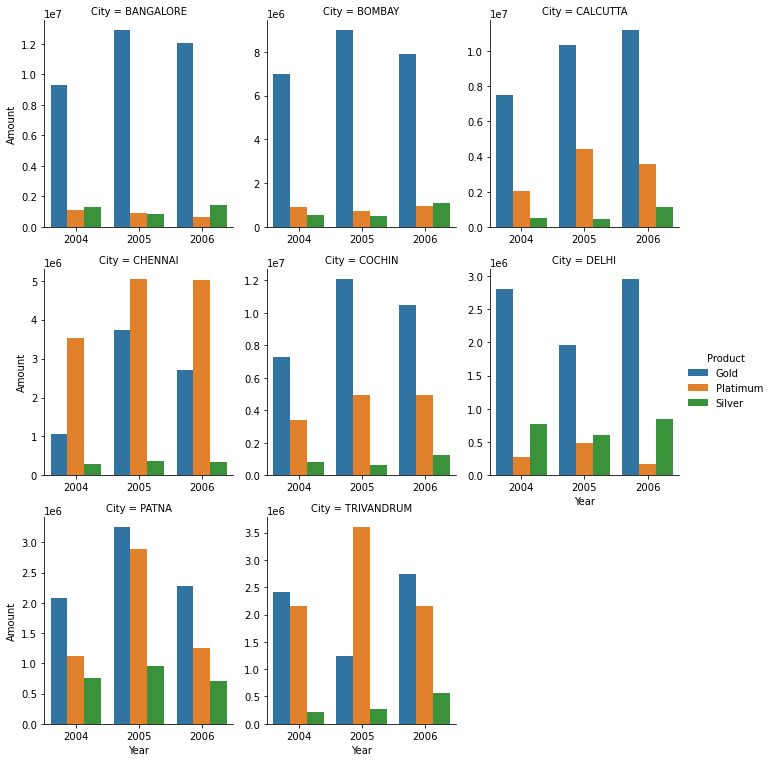

In [40]:
plt.tight_layout()
sns.catplot(x='Year',y='Amount',hue='Product',
            data=plot_data,col='City',ci=None,kind='bar',sharey=False,sharex=False,aspect=0.9,height=3.5,col_wrap=3)
plt.show()

### 4. Create graphs for
        a. Monthly comparison of total spends, city wise
        b. Comparison of yearly spend on air tickets
        c. Comparison of monthly spend for each product (look for any seasonality
        that exists in terms of spend)

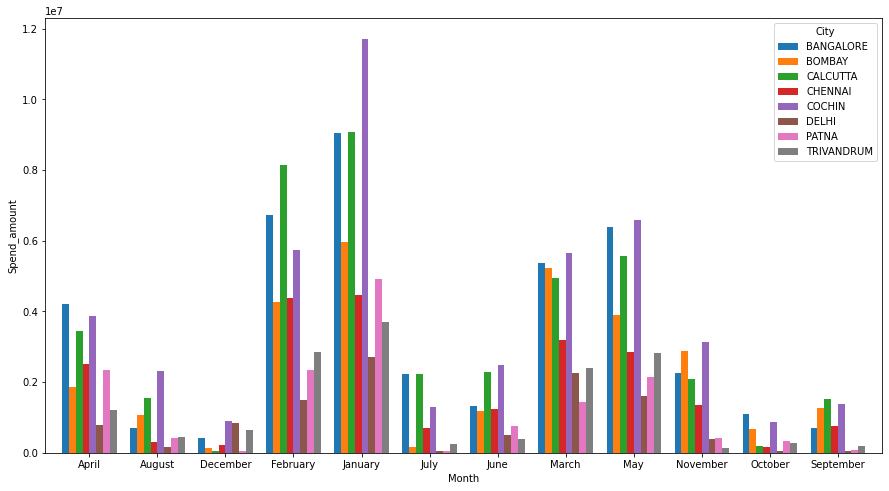

In [41]:
# Part:A Monthly comparison of total spends, city wise
cust_spend.pivot_table(index='Month',columns='City',values='Amount',aggfunc='sum').plot(kind='bar',
                                                                                        figsize=(15,8),rot=0,
                                                                                        width=0.8,ylabel='Spend_amount')
plt.show()

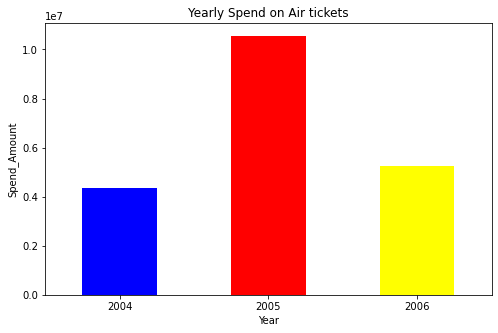

In [42]:
# Part:B Comparison of yearly spend on air tickets
cust_spend[cust_spend.Type=='AIR TICKET'].groupby('Year')['Amount'].sum().plot(kind='bar',
                                                                               color=['blue','red','yellow'],
                                                                                  figsize=(8,5),
                                                                              ylabel='Spend_Amount',rot=0,
                                                                               title='Yearly Spend on Air tickets'
                                                                              )

plt.show()


In [43]:
# Part:C Comparison of monthly spend for each product
#    (look for any seasonality that exists in terms of spend)

<Figure size 432x288 with 0 Axes>

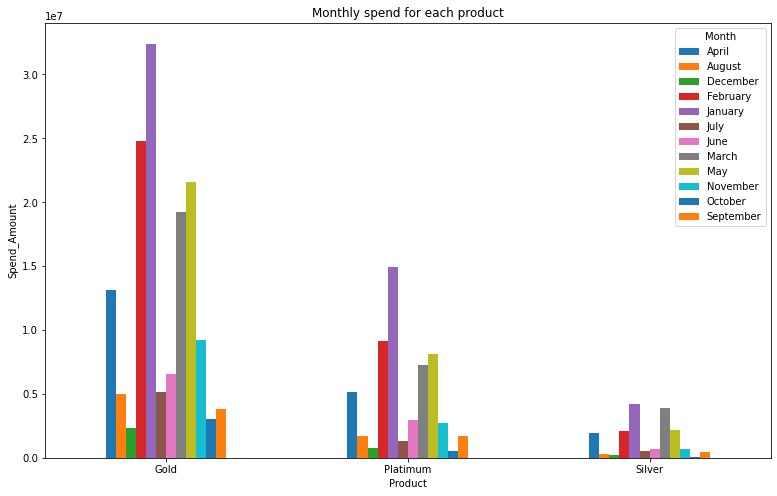

In [45]:
plt.tight_layout()
cust_spend.pivot_table(index='Product',columns="Month",values='Amount',aggfunc=sum).plot(kind='bar',
                                                                                        figsize=(13,8),
                                                                                        ylabel='Spend_Amount',rot=0,
                                                                                        title='Monthly spend for each product')
plt.show()

# High spend was observed in the months of January,February,March and May for all the products.
# Maximum spend observed in the month of january.

### 5. Write user defined PYTHON function to perform the following analysis:
    You need to find top 10 customers for each city in terms of their repayment amount by
    different products and by different time periods i.e. year or month. The user should be able
    to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the
    function should automatically take these inputs while identifying the top 10 customers

In [25]:
def top_10_cust(product,time):
    if((product.capitalize() in(['Gold','Platimum','Silver'])) and (time.capitalize() in ['Month','Year'])):
        ans=cust_repay[cust_repay.Product==product.capitalize()].pivot_table(index=['Product','City','Customer'],columns=time.capitalize() ,values='Amount')
    else:
        ans=print('Give the product name and timeperiod in proper format ')
           
    return ans
        

In [26]:
top_10_cust(product='Silver',time='Month')

Month                              April     August   December       February  \
Product City       Customer                                                     
Silver  BANGALORE  A18       100000.0000  100000.00        NaN   38296.410000   
                   A23        81016.7180  100001.00        NaN   94584.264000   
                   A59        16652.7200        NaN        NaN  100003.000000   
                   A72               NaN        NaN        NaN  100000.000000   
                   A76               NaN        NaN        NaN  265619.050000   
                   A77               NaN        NaN        NaN    3159.620000   
        BOMBAY     A22        98035.2300  100000.00        NaN   87453.722500   
                   A75               NaN        NaN        NaN  100003.000000   
                   A80               NaN        NaN        NaN            NaN   
        CALCUTTA   A2        100000.0000  100000.00        NaN  100000.000000   
                   A58       100002.0000        NaN        NaN   95792.985000   
                   A73               NaN        NaN        NaN  100001.000000   
                   A78               NaN        NaN        NaN            NaN   
                   A87               NaN        NaN        NaN            NaN   
        CHENNAI    A85               NaN        NaN        NaN            NaN   
                   A9         43323.9000        NaN        NaN   88975.470000   
                   A96               NaN        NaN        NaN            NaN   
        COCHIN     A100              NaN        NaN        NaN            NaN   
                   A25       100003.0000    1168.46        NaN   78719.083333   
                   A7                NaN        NaN  100001.00  100001.000000   
                   A74               NaN        NaN        NaN  100002.000000   
                   A79               NaN        NaN        NaN            NaN   
        DELHI      A24        55515.1475  100002.00  100002.00   95531.043333   
                   A6                NaN        NaN   27398.18  100000.000000   
        PATNA      A46        81948.3700        NaN        NaN   90705.298333   
                   A8        100002.0000        NaN        NaN  100002.000000   
                   A84               NaN        NaN        NaN            NaN   
        TRIVANDRUM A57        88689.2850        NaN  100001.00  100001.000000   
                   A68               NaN        NaN        NaN            NaN   
                   A86               NaN        NaN        NaN            NaN   

Month                              January      July       June  \
Product City       Customer                                       
Silver  BANGALORE  A18        78318.542000       NaN  100000.00   
                   A23        91976.824000  100001.0        NaN   
                   A59        95310.300000  100003.0   55292.68   
                   A72                 NaN       NaN        NaN   
                   A76                 NaN       NaN        NaN   
                   A77                 NaN       NaN        NaN   
        BOMBAY     A22       100000.000000  100000.0  100000.00   
                   A75                 NaN       NaN        NaN   
                   A80                 NaN       NaN        NaN   
        CALCUTTA   A2        100000.000000       NaN        NaN   
                   A58        66762.324000       NaN  100002.00   
                   A73                 NaN       NaN        NaN   
                   A78                 NaN       NaN        NaN   
                   A87                 NaN       NaN        NaN   
        CHENNAI    A85                 NaN       NaN        NaN   
                   A9         76038.668000       NaN        NaN   
                   A96       100000.000000       NaN        NaN   
        COCHIN     A100       69551.190000       NaN        NaN   
                   A25        97722.013333  100003.0        NaN   


In [50]:
top_10_cust(product='GOLD',time='year')

Year                                  2004           2005           2006
Product City       Customer                                             
Gold    BANGALORE  A1        337113.977143  218451.252857  216183.765000
                   A13       389502.128333  289051.769231  289776.240833
                   A14       307806.811111  249198.161000  223418.810000
                   A30       244694.292500  296416.264444  177639.886429
                   A43       238312.183750  308227.430769  257641.739000
                   A63       394427.800000            NaN  211117.120000
                   A81                 NaN            NaN  207780.320000
                   A88                 NaN            NaN  146821.300000
                   A92                 NaN            NaN  459105.690000
        BOMBAY     A12       292385.112500  239799.025000  283462.814545
                   A17       237574.670000  182785.957500  312778.314000
                   A42       253826.225833  284159.857273  180473.465000
                   A62       290685.708333  256936.201667  240583.670000
                   A91                 NaN            NaN  247781.000000
        CALCUTTA   A10       223047.632500  155855.491250  259435.510000
                   A15       262875.652500  286794.798333  278314.143000
                   A29       344198.485000  155161.747273  286191.500000
                   A31       407599.130000  362160.427500  169755.378889
                   A60       289072.181000  267346.864286  231622.345000
                   A89                 NaN            NaN  497237.970000
        CHENNAI    A27       263260.434286  278259.171000  238748.581000
                   A67        67845.600000   55638.770000            NaN
        COCHIN     A11       319518.796667  292210.125714  288363.345000
                   A16       224442.232000  204374.526667  212374.403333
                   A32       344312.670000  174168.365000  168589.850000
                   A45       232540.671818  310957.505385  263991.415714
                   A61       228923.177273  305490.039286  288009.800769
                   A65       468922.600000  230667.340000            NaN
                   A90                 NaN            NaN  109931.320000
                   A94       153465.890000            NaN            NaN
        DELHI      A44       238820.388889  277687.851333  204289.835714
                   A64                 NaN            NaN  161614.545000
                   A82                 NaN            NaN  342200.740000
                   A93       342326.140000            NaN            NaN
        PATNA      A26       186303.480000  270426.438889  333042.130000
                   A66       477039.780000            NaN  113094.580000
                   A95       369405.960000            NaN            NaN
        TRIVANDRUM A28       160851.415000  314112.202222  281384.554167